# Self-Help Books Recommendation

## Web Scraping and EDA Project

### 1. Introduction
#### 1.1 Project Goal
In this project, we aim to recommend self-help books based on data collected from Goodreads.

#### 1.2 Tools
We will utilize various data analysis and visualization tools to accomplish this project such as 
- Python
- BeautifulSoup
- Requests
- Pandas
- Matplotlib
- Seaborn


#### 1.4 Features
The data features obtained from web scraping include 
- Book titles
- Authors
- Ratings
- Average ratings
- Publication years
- Editions

These features will serve as the foundation for our analysis and recommendations in this project.

### 2. Exploratory Analysis
#### 2.1 Pre-Processing
In the pre-processing stage, we performed the following steps to clean and prepare the dataset for analysis:

* Make changes to specific rows in the 'Title' column based on the 'Author' column's values.
* Convert the 'Rating' column from a string with commas to integers.
* Calculate a 'Weighted Rating' based on the product of 'Average Rating' and 'Rating'.
* Check for and remove duplmissing values.
* Check for and remove duplicate entries.
* We will filter out rows with a 'Rating' of 0.

These steps ensured that the dataset was ready for meaningful analysis and recommendation.


#### 2.2 Inspecting Features
Analyze the characteristics and statistics of the self-help books dataset.
- Explore correlations between quantitative variables
- Explore the distribution of a quantitative variables

#### 2.3 Most Popular Authors
We examine the authors of self-help books.
- Most popular authors based on authors with the most published books
- Most popular authors based on most ratings

#### 2.4 Most Rated and Most Popular Books
We identified and presented the self-help books that have received the highest ratings and are considered the most popular among readers.

### 3. Most Recommended Books
#### 3.1 Top 10 Most Recommended Self-Help Books
We highlighted the top 10 self-help books that are highly recommended based on the collected data based on highest ratings.

#### 3.2 Getting Books From The Recommended List


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\user\\Desktop\\projects\\Python\\Goodreads_books.csv")

# Display the first few rows of the DataFrame
df.head()

,Title,Author,Average Rating,Rating,Year Published,Edition
0,"10% Happier: How I Tamed the Voice in My Head,...",Dan Harris,3.92,"4,207",2014,1
1,Self-Help,Lorrie Moore,4.14,"3,332",1985,39
2,Parenting from the Inside Out: How a Deeper Se...,Daniel J. Siegel,4.16,"4,623",2003,48
3,What's Our Problem?: A Self-Help Book for Soci...,Tim Urban,4.30,"2,720",2023,1
4,How to Be Fine: What We Learned from Living by...,Jolenta Greenberg,3.55,"4,272",2020,10


### Data Cleaning

We will do the following for the task of data cleaning:

* Make changes to specific rows in the 'Title' column based on the 'Author' column's values.
* Convert the 'Rating' column from a string with commas to integers.
* Calculate a 'Weighted Rating' based on the product of 'Average Rating' and 'Rating'.
* Check for and remove duplmissing values.
* Check for and remove duplicate entries.
* We will filter out rows with a 'Rating' of 0.

In [3]:
# Update the 'Title' column for rows where 'Author' is 'Dalai Lama XIV'
df.loc[df['Author'] == 'Dalai Lama XIV', 'Title'] = "The Universe in a Single Atom: The Convergence of Science and Spirituality"

In [4]:
# Get the shape of the DataFrame
df.shape

(11760, 6)

In [5]:
## Check the data types of each column in our dataset
df.dtypes

Title              object
Author             object
Average Rating    float64
Rating             object
Year Published      int64
Edition             int64
dtype: object

In [6]:
# Convert the 'Rating' column from object to integer by removing commas
df["Rating"] = pd.to_numeric(df["Rating"].str.replace(",", ""))

# Create a new column for Weighted Rating
df['Weighted Rating'] = df['Average Rating'] * df['Rating']

In [7]:
# Check if the change was effected
df.dtypes

Title               object
Author              object
Average Rating     float64
Rating               int64
Year Published       int64
Edition              int64
Weighted Rating    float64
dtype: object

In [8]:
# Check for null values in the dataset
df.isnull().sum()

# Remove duplicate entries
df.drop_duplicates(keep='last', inplace=True)

# Select only rows with at least 1 Rating
df = df[df["Rating"] != 0]

 No null values remain in the dataset.
 Now, let's explore the dataset to get a better understanding.

In [9]:
len(df)

1535

In [10]:
### Data Exploration

# Display summary statistics of the numerical columns
print(df.describe())

       Average Rating       Rating  Year Published      Edition  \
count     1535.000000  1535.000000     1535.000000  1535.000000   
mean         3.880332   145.082736     1037.210423    14.774593   
std          0.668326   703.872926     1012.975697   205.709501   
min          1.000000     1.000000        0.000000     1.000000   
25%          3.570000     4.000000        0.000000     1.000000   
50%          4.000000     9.000000     1980.000000     2.000000   
75%          4.285000    29.500000     2012.000000     4.000000   
max          5.000000  9835.000000     6556.000000  6556.000000   

       Weighted Rating  
count      1535.000000  
mean        573.194436  
std        2792.462363  
min           1.000000  
25%          15.000000  
50%          36.000000  
75%         114.040000  
max       40618.550000  


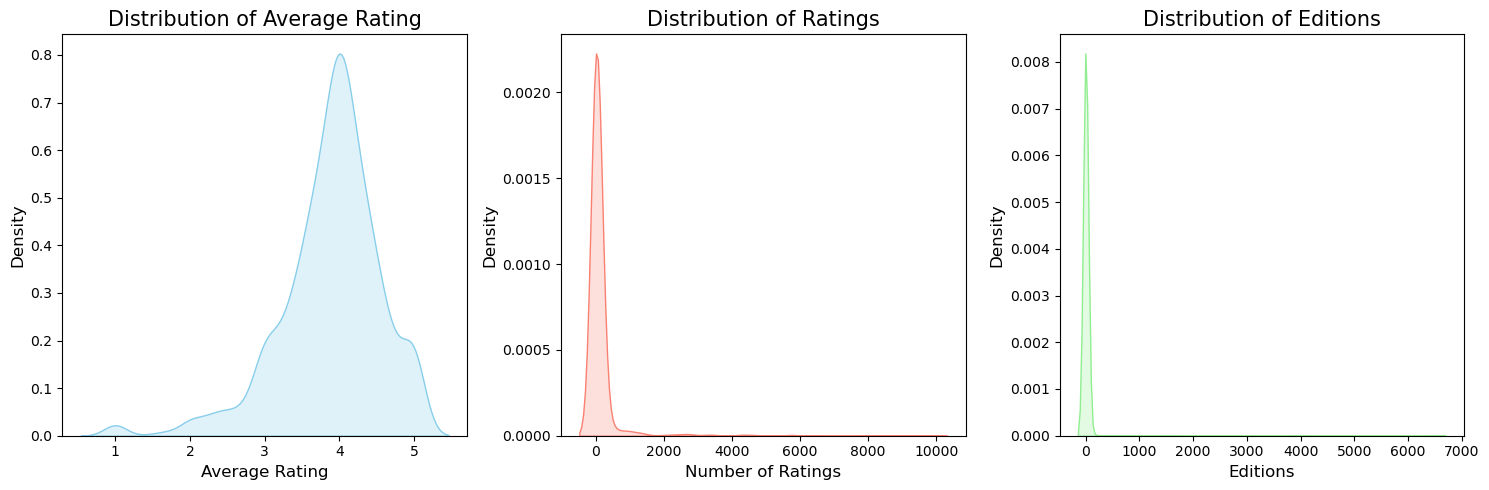

In [11]:
# Create subplots for distributions of key columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Average Rating Distribution
sns.kdeplot(df["Average Rating"], shade=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Average Rating', fontsize=15)
axes[0].set_xlabel('Average Rating', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Plot Number of Ratings Distribution
sns.kdeplot(df["Rating"], shade=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Ratings', fontsize=15)
axes[1].set_xlabel('Number of Ratings', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Plot Editions Distribution
sns.kdeplot(df["Edition"], shade=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Editions', fontsize=15)
axes[2].set_xlabel('Editions', fontsize=12)
axes[2].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

#### Explore correlations between quantitative variables

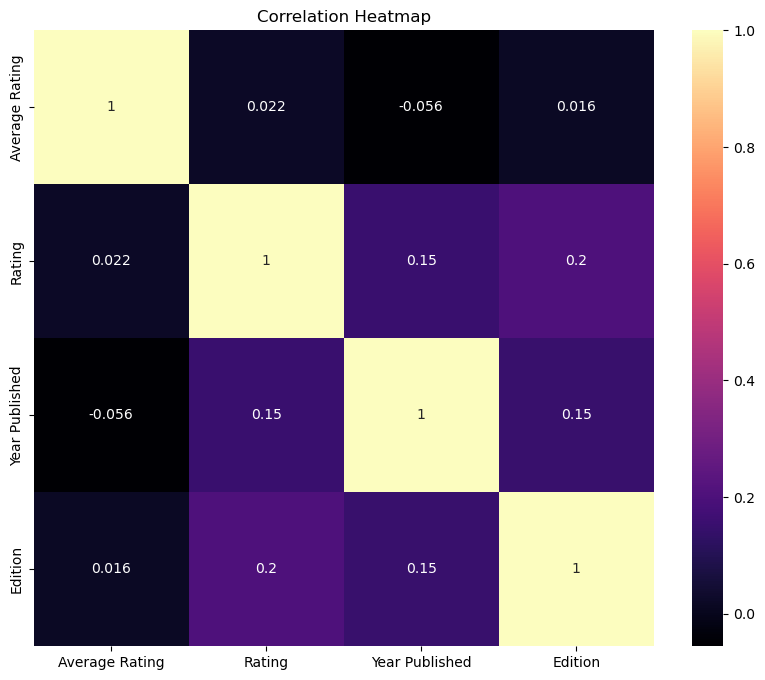

In [12]:
selected_columns = ['Average Rating', 'Rating', 'Year Published', 'Edition']
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='magma', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

## Most popular authors (Top 20)

In [13]:
most_popular = df[['Author', 'Rating']]
author_ratings = most_popular.groupby('Author')['Rating'].sum().reset_index()
top_20_most_popular = author_ratings.sort_values(by='Rating', ascending=False).head(20)
top_20_most_popular

,Author,Rating
1201,Wallace D. Wattles,11248
987,Russell H. Conwell,9250
546,Jen Sincero,8807
102,Arnold Bennett,8096
756,Mark Manson,6413
816,Miranda Sings,5786
747,Marianne Power,5752
701,Laurie A. Helgoe,5688
403,George S. Clason,5040
249,Dale Carnegie,4945


In [14]:
authors_published_books = df.groupby('Author')['Title'].nunique().reset_index()
top_authors_published_books = authors_published_books.sort_values(by='Title', ascending=False)
top_authors_published_books

,Author,Title
772,Matt Buonocore,17
139,Birister Sharma,16
650,Katherine Chambers,13
145,Book Tigers,12
195,Chapter Zoom,9
...,...,...
435,Hannah Spivey,1
434,Hannah Oak,1
433,Hanna Monahan,1
432,Hanif Wyatt,1


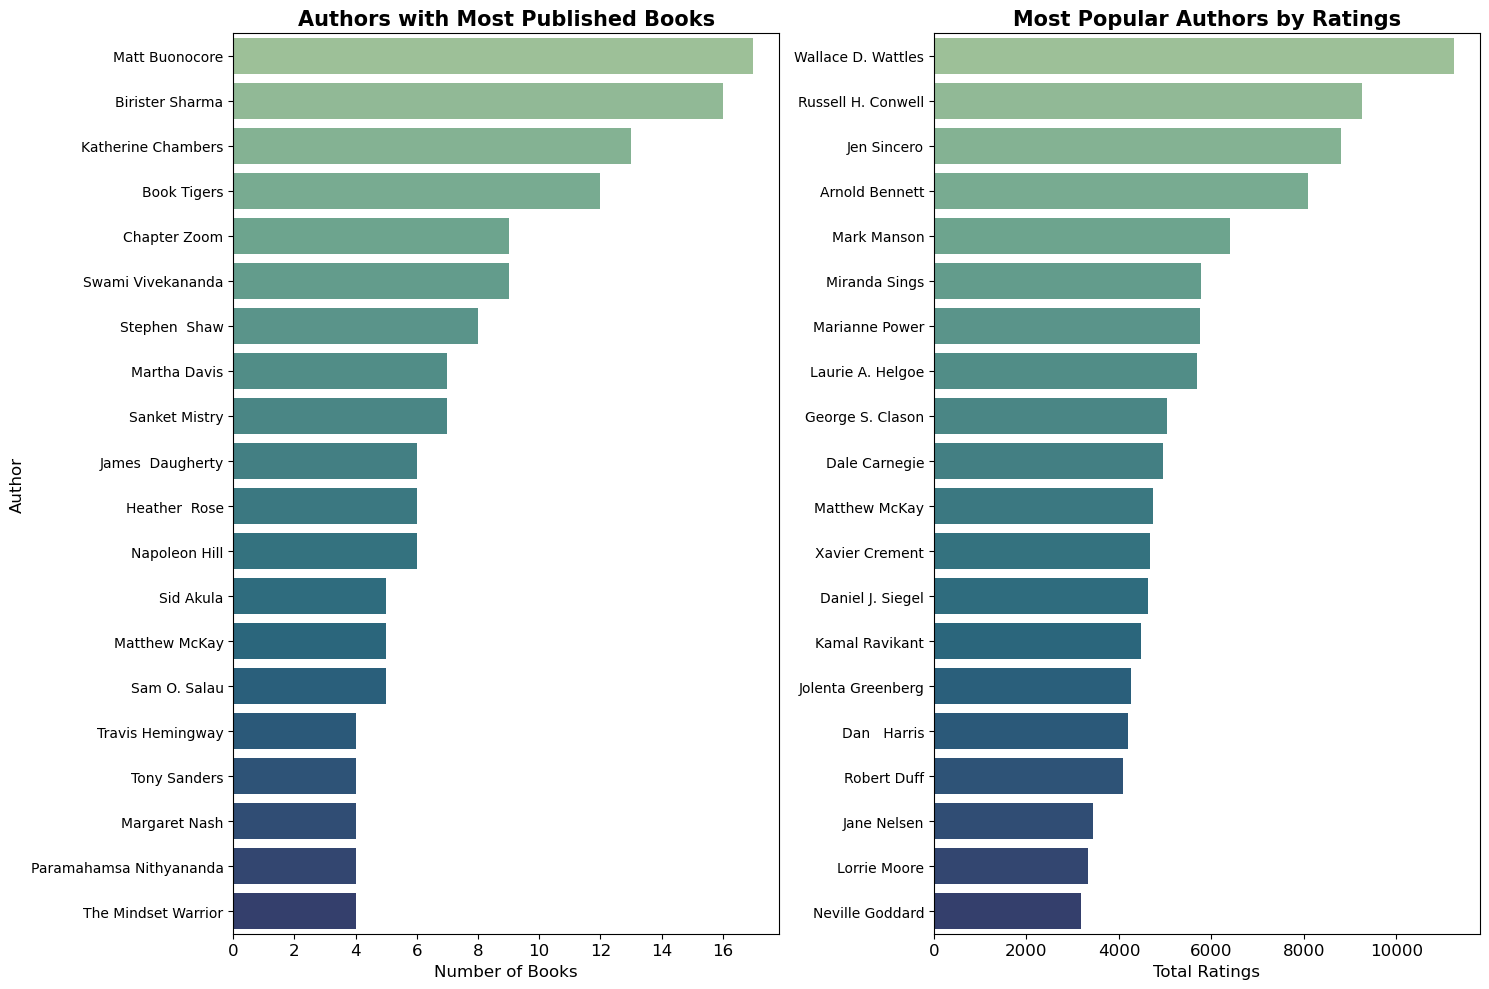

In [15]:
plt.figure(figsize=(15, 10))

# Subplot for authors with the most published books
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Title', y='Author', data=top_authors_published_books.head(20), palette='crest')
plt.ylabel('Author', fontsize=12)
plt.xlabel('Number of Books', fontsize=12)
plt.title('Authors with Most Published Books', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)

# Subplot for most popular authors
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Rating', y='Author', data=top_20_most_popular, palette='crest')
plt.ylabel('')
plt.xlabel('Total Ratings', fontsize=12)
plt.title('Most Popular Authors by Ratings', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)

plt.tight_layout()
plt.show()


### Most Rated Books Vs Most Popular Books

In [16]:
# using set_table_attributes to display two dataframes side by side

from IPython.display import display_html 

# Create a Book_ID column
df['Book_ID'] = np.arange(1, len(df) + 1)

# Sort and select the top 10 most rated and most popular books
most_rated_books = df[['Book_ID', 'Average Rating']].sort_values(by='Average Rating', ascending=False).head(10)
most_popular_books = df[['Book_ID', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

# Define a function to highlight BookID in the table
def highlight_cols(s):
    color = 'green'
    return 'background-color: %s' % color

# applying styles and displaying

df1_styler = most_rated_books.reset_index().style.set_table_attributes(
                    "style='display:inline'").set_caption('Most Rated Books').applymap(highlight_cols, 
                    subset=pd.IndexSlice[:, ['Book_ID']]).format({'Avg. Rating': '{:,.1f}'})

df2_styler = most_popular_books.reset_index().style.set_table_attributes(
                        "style='display:inline'").set_caption('Most Popular Books').applymap(highlight_cols, 
                        subset=pd.IndexSlice[:, ['Book_ID']]).format({'Num. of Ratings': '{:,.1f}'})

display_html(df1_styler._repr_html_() + ' ' + df2_styler._repr_html_(), raw=True)



,index,Book_ID,Average Rating
0,978,841,5.000000
1,1538,1199,5.000000
2,1882,1417,5.000000
3,1536,1197,5.000000
4,1911,1425,5.000000
5,4621,1432,5.000000
6,6661,1438,5.000000
7,144,143,5.000000
8,1504,1181,5.000000
9,1461,1152,5.000000


## 3. Recommended Books

#### 3.1 Top 10 Most Recommended Self-Help Books

In [17]:
# Create a table of the top 10 most recommended self-help books
most_recommended = df.sort_values(by='Weighted Rating', ascending=False).set_index('Title').head(10)

# Abbreviate long book titles
max_title_length = 50  # You can adjust this as needed

def abbreviate_title(title):
    if len(title) > max_title_length:
        return title[:max_title_length - 3] + '...'
    else:
        return title

most_recommended.index = most_recommended.index.map(abbreviate_title)

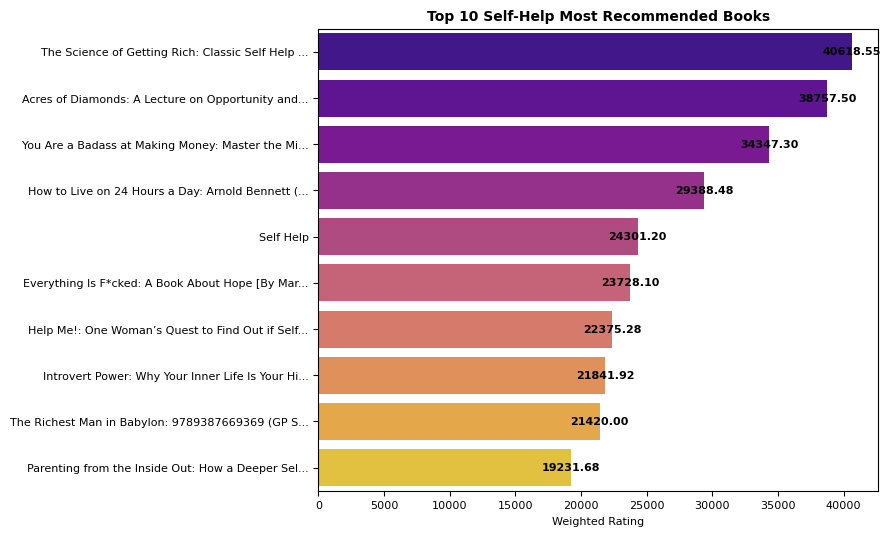

In [18]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x=most_recommended['Weighted Rating'], y=most_recommended.index, palette='plasma')
plt.ylabel('')
plt.xlabel('Weighted Rating', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Top 10 Self-Help Most Recommended Books', fontsize=10, fontweight='bold')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.02, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=8, color='black', fontweight='bold')

plt.subplots_adjust(left=0.2, right=0.9)
plt.show()

In [19]:
# making a table with all information about the top 10 books

print("\n\nMost Recommended Books in Self Help Based on Goodreads Ratings")
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '12px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7ffff')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '12px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

most_recommended.drop(most_recommended[['Weighted Rating', 'Book_ID']],axis=1).reset_index().style.set_table_styles(
                                        styles).format({'Avg. Rating': '{:.1f}',
                                                        'Num. of Ratings': '{:,.0f}', 
                                                        'Editions': '{:.0f}', 
                                                        'Published Year': '{:.0f}'})




Most Recommended Books in Self Help Based on Goodreads Ratings


,Title,Author,Average Rating,Rating,Year Published,Edition
0,The Science of Getting Rich: Classic Self Help ...,Wallace D. Wattles,4.130000,9835,1910,1536
1,Acres of Diamonds: A Lecture on Opportunity and...,Russell H. Conwell,4.190000,9250,1953,721
2,You Are a Badass at Making Money: Master the Mi...,Jen Sincero,3.900000,8807,2017,40
3,How to Live on 24 Hours a Day: Arnold Bennett (...,Arnold Bennett,3.630000,8096,1908,818
4,Self Help,Miranda Sings,4.200000,5786,2015,12
5,Everything Is F*cked: A Book About Hope [By Mar...,Mark Manson,3.700000,6413,2019,115
6,Help Me!: One Woman’s Quest to Find Out if Self...,Marianne Power,3.890000,5752,2018,61
7,Introvert Power: Why Your Inner Life Is Your Hi...,Laurie A. Helgoe,3.840000,5688,2008,6
8,The Richest Man in Babylon: 9789387669369 (GP S...,George S. Clason,4.250000,5040,1926,220
9,Parenting from the Inside Out: How a Deeper Sel...,Daniel J. Siegel,4.160000,4623,2003,48


### 3.2 Getting Books From The Recommended List

In [20]:
# List with prices and links

data = ['https://www.amazon.com/Science-Getting-Rich-Wallace-Wattles/dp/1984052330',
        'https://www.amazon.com/Acres-Diamonds-Russell-H-Conwell-ebook/dp/B004UJMBGI',
       'https://www.amazon.com/You-Are-Badass-Making-Money-ebook/dp/B01HPCSD54',
       'https://www.amazon.com/How-Live-Hours-Day-Literature-ebook/dp/B09WJC75WW',
        'https://www.amazon.com/Selp-Helf-Miranda-Sings-ebook/dp/B00TBKUVEK',
        'https://www.amazon.com/Everything-cked-About-Subtle-Giving-ebook/dp/B07DTJ8YNJ',
        'https://www.amazon.com/Help-Me-Marianne-Power-ebook/dp/B07ML4T27B/ref=sr_1_1?crid=55O3EO0A4ERE',
        'https://www.amazon.com/Introvert-Power-Inner-Hidden-Strength-ebook/dp/B00BL5Q6DS',
        'https://www.amazon.com/Richest-Man-Babylon-George-Clason-ebook/dp/B07H7HN6DN',
        'https://www.amazon.com/Parenting-Inside-Out-Self-Understanding-Anniversary-ebook/dp/B00HZ1E5BM']
        
        
        
def clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)


prices = ['USD 6.89 (Paper Back)', 'USD 39.90', 'USD 19.31', 'USD 18.60 (Paper Back)', 'USD 9.08', 'USD 11.70 (Paper Back)', 'USD 19.08', 'USD 11.69 (Paper Back)',
         'USD 9.99', 'USD 11.99']

to_buy = pd.DataFrame({
    'Book': most_recommended.index,
    'Author': most_recommended['Author'],
    'Price': prices,
    'Link to Book': data})

print("\n\nGetting Books from Recommended List")

to_buy.reset_index().drop('Title', axis=1).style.set_table_styles(styles).format({'Link to Book': clickable})



Getting Books from Recommended List


,Book,Author,Price,Link to Book
0,The Science of Getting Rich: Classic Self Help ...,Wallace D. Wattles,USD 6.89 (Paper Back),https://www.amazon.com/Science-Getting-Rich-Wallace-Wattles/dp/1984052330
1,Acres of Diamonds: A Lecture on Opportunity and...,Russell H. Conwell,USD 39.90,https://www.amazon.com/Acres-Diamonds-Russell-H-Conwell-ebook/dp/B004UJMBGI
2,You Are a Badass at Making Money: Master the Mi...,Jen Sincero,USD 19.31,https://www.amazon.com/You-Are-Badass-Making-Money-ebook/dp/B01HPCSD54
3,How to Live on 24 Hours a Day: Arnold Bennett (...,Arnold Bennett,USD 18.60 (Paper Back),https://www.amazon.com/How-Live-Hours-Day-Literature-ebook/dp/B09WJC75WW
4,Self Help,Miranda Sings,USD 9.08,https://www.amazon.com/Selp-Helf-Miranda-Sings-ebook/dp/B00TBKUVEK
5,Everything Is F*cked: A Book About Hope [By Mar...,Mark Manson,USD 11.70 (Paper Back),https://www.amazon.com/Everything-cked-About-Subtle-Giving-ebook/dp/B07DTJ8YNJ
6,Help Me!: One Woman’s Quest to Find Out if Self...,Marianne Power,USD 19.08,https://www.amazon.com/Help-Me-Marianne-Power-ebook/dp/B07ML4T27B/ref=sr_1_1?crid=55O3EO0A4ERE
7,Introvert Power: Why Your Inner Life Is Your Hi...,Laurie A. Helgoe,USD 11.69 (Paper Back),https://www.amazon.com/Introvert-Power-Inner-Hidden-Strength-ebook/dp/B00BL5Q6DS
8,The Richest Man in Babylon: 9789387669369 (GP S...,George S. Clason,USD 9.99,https://www.amazon.com/Richest-Man-Babylon-George-Clason-ebook/dp/B07H7HN6DN
9,Parenting from the Inside Out: How a Deeper Sel...,Daniel J. Siegel,USD 11.99,https://www.amazon.com/Parenting-Inside-Out-Self-Understanding-Anniversary-ebook/dp/B00HZ1E5BM


# Conclusion

In this self-help book recommendation project, we leverage web scraping and exploratory data analysis to provide valuable insights and recommendations for readers seeking personal development and self-improvement literature. Our analysis of the Goodreads data led to several key takeaways.

We began by setting clear project goals and describing the tools and techniques used in data collection. Web scraping was employed to extract data on self-help books from Goodreads, and this data was subsequently pre-processed to ensure its quality and reliability. We delved into various features, including book titles, authors, ratings, and popularity metrics, to gain a comprehensive understanding of the self-help book landscape.

Through exploratory analysis, we identified the most rated and most popular self-help books, shedding light on the preferences and choices of readers in the genre. Furthermore, we highlighted the authors and their contributions to the self-help literature domain, revealing the voices that resonate most with readers seeking personal growth and motivation.

At the end of our project, we presented the top 10 most recommended self-help books based on our analysis of the collected data. These recommendations serve as a valuable resource for individuals looking to embark on a journey of self-improvement, offering insights into the books that have had a profound impact on others.

# Key Takeaways

1. **Data-Driven Insights:** Data analysis, including web scraping and exploratory data analysis, provides a data-driven approach to understanding self-help book preferences. By leveraging such insights, readers can make informed decisions when choosing their next self-help book.

2. **Author Insights**: We've uncovered valuable information about prolific authors and their most popular works. This sheds light on the authors shaping the landscape of self help literature.

3. **Readers' Choice:** The most rated and popular self-help books identified in our analysis reflect the choices and recommendations of a broad readership. These books have struck a chord with readers and are worth exploring.

4. **Top Recommendations:** Our project concluded with a list of the top 10 most recommended self-help books. These recommendations serve as a curated guide for those seeking guidance, motivation, and personal development.

In conclusion, this project is not only an exploration of data but also a journey toward self-improvement through literature. We hope that the insights and recommendations provided here will assist readers in their quest for personal growth, empowerment, and a more fulfilling life. Remember that the right self-help book can be a powerful catalyst for positive change, and the journey to self-improvement begins with a single page turned.
